# Exercice 1

On considère 4 évènements $\mathcal{A}$, $\mathcal{B}$, $\mathcal{C}$, and $\mathcal{D}$. Associées aux ensembles $A,B,C,D$ dans l'univers $\Omega$.

1- Que vaut $P(\bar{C})$ ?

Si on considère le cas:

$$ P(\bar{C}) = \Omega - P(C) $$

Si $P(C)=0.3$, alors $P(\bar{C})=1-0.3=0.7$

2- Que valent $P(B|C)$ et $P(C|B)$

On calcule en premier $P(B)$. On sait que $C + \bar{C} = \Omega$, alors $B \cap (C \cup \bar{C})$.

De même $P(B) = P(B \cap C) + P(B \cup \bar{C}) = 0.2 + 0.3 = 0.5$ 


Finalement, on peut calculer:
$P(B|C)= \frac{P(B \cap C)}{P(C)} = \frac{0.2}{0.3} = \frac{2}{3} $ 

et $P(C|B)= \frac{P(C \cap B)}{P(B)} = \frac{0.2}{0.5} = 0.4 $

3- Les évènements $C$ et $D$ sont-ils incompatibles? Justifier.

On sait que $P(C)=0.3$ et $P(D)=0.5$, ainsi que $P(D \cap \bar{C})=0.5$. Aussi, on sait que deux évènements sont incompatibles si $P(C \cap D) = 0$.

Alors, si $C = 1 - \bar{C}$, et $D = D \cap (C \cup \bar{C}) = (D \cap C) \cup (D \cap \bar{C}),$

$$
P(D) = P(D \cap C) + P(D \cap \bar{C})
$$
$$
P(D \cap C) = P(D) - P(D \cap \bar{C})
$$
$$
P(D \cap C) = 0.5 - 0.5 = 0
$$

Donc $C$ et $D$ sont incompatibles.

# Exercice 2

1 - Un tireur de fléchettes touche sa cible 1 fois sur 2. Combien de fois doit-il tirer pour avoir une probabilité minimale de 99~% de toucher la cible au moins une fois?

On sait que $P(X \geq 1) = 1 - P(X=0)$. On cherche donc $P(X=0)$ c'est-à-dire la probabilité de toucher une fois la cible. On sait que $P(X=0)=(1-p)^n$, où $n$ est le nombre de fois qu'il tire, et $p=\frac{1}{2}$ (1 fois sur deux).

On veut que cette probabilité soit plus grande que 0.99, alors:
$$ (1-p)^n > 0.99 $$
$$ 1-p^n > 0.99 $$
$$ p^n < 0.01 $$
$$ n \log{p} < \log{0.01} $$
$$ n < \frac{\log{0.01}}{\log{p}} = \frac{-2}{\log{0.5}} $$
$$ n > 6.643856189774724 $$


In [2]:
# 2
import random

In [3]:
def touche_cible(n):
    """
    Cette fonction simule pour n lancers des fléchettes si le joueur touche la cible ou pas. 
    Si le joueur touche la cible, la fonction retourne True, sinon elle retourne False.
    """
    # On crée une liste de n fléchettes
    flechettes = [random.random() for i in range(n)]
    p = 1 / 2
    # Retourne True si au moins une fléchette touche la cible, False sinon
    # si elle touche la cible flechette > p
    for flechette in flechettes:
        if flechette > p:
            return True
    return False

In [4]:
nombre_succes = 0
nombre_essais = 10000
for i in range(nombre_essais):
    if touche_cible(10):
        nombre_succes += 1

print("Proba: {:.3f}".format(nombre_succes/nombre_essais))
print("Proba theorique: {:.3f}".format(1-(0.5)**7))

Proba: 0.999
Proba theorique: 0.992


# Exercice 3

On va caractériser la distribution de mesures de température et de pression avec les grandeurs statistiques que nous avons vues.

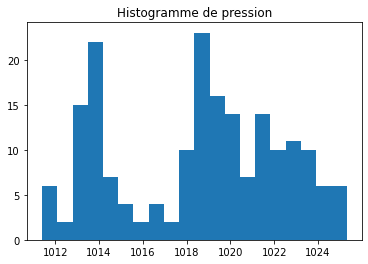

In [37]:
# 1 
# Lire les données avec pandas
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
from scipy.stats import skew

url = 'https://github.com/guiguem/physexp2/releases/download/v1/meteo.csv'
meteo = pd.read_csv(url, header=10)

# Extraction des dates
dates = meteo[meteo.columns[0]].to_list()
# Conversion des dates en objets datetime
dates = [datetime.strptime(date, '%Y%m%dT%H%M') for date in dates]
# Extraire les données de température (column 1) et de pression (column 3)
temp = pd.to_numeric(meteo[meteo.columns[1]]).to_list()
pression = pd.to_numeric(meteo[meteo.columns[3]]).to_list()
# Afficher pression sous la forme d'un histogramme

plt.hist(pression, bins=20)
plt.title('Histogramme de pression')
plt.show()


In [38]:
# 2 - 
# 
# Calculer la valeur de la moyenne à partir de \miu = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i

def moyenne(liste):
    """
    Cette fonction calcule la moyenne d'une liste de nombres.
    """
    somme = 0
    for x in liste:
        somme += x
    return somme / len(liste)

# Calculer la valeur de la variance à partir de \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2

def variance(liste):
    """
    Cette fonction calcule la variance d'une liste de nombres.
    """
    somme = 0
    for x in liste:
        somme += (x - moyenne(liste))**2
    return somme / len(liste)

moyenne_pression = moyenne(pression)
variance_pression = variance(pression)
print("Moyenne pression: {:.3f}".format(moyenne_pression))
print("Variance pression: {:.3f}".format(variance_pression))

# On compare avec les fonctions numpy.mean et numpy.var
print("Moyenne pression avec numpy: {:.3f}".format(np.mean(pression)))
print("Variance pression avec numpy: {:.3f}".format(np.var(pression)))

Moyenne pression: 1018.568
Variance pression: 14.266
Moyenne pression avec numpy: 1018.568
Variance pression avec numpy: 14.266


In [39]:
# 3 - 

# Calculer l'asymmétrie S de la distribution de pression à partir de \alpha = \frac{1}{n} \sum_{i=1}^{n} \frac{(x_i - \bar{x})^3}{\sigma^3}
# On a miu = moyenne et sigma^2 = variance

def asymmetrie_1(liste):
    """
    Cette fonction calcule l'asymétrie d'une liste de nombres.
    """
    somme = 0
    for x in liste:
        somme += (x - moyenne(liste))**3 / variance(liste)**(3/2)
    return somme / len(liste)

# On utilise la formule de l'asymétrie  \frac{\frac{1}{N} \sum^N_{i=0} (x_i)^3 - 3 \miu \sigma^2 - \miu^3}{\sigma^3}
def asymmetrie_2(liste):
    """
    Cette fonction calcule l'asymétrie d'une liste de nombres.
    """
    somme = 0
    for x in liste:
        somme += x**3
    return (somme / len(liste) - 3 * moyenne(liste) * variance(liste) - moyenne(liste)**3) / variance(liste)**(3/2)


asymmetrie_pression_1 = asymmetrie_1(pression)
asymmetrie_pression_2 = asymmetrie_2(pression)
print("Asymétrie pression: {:.3f}".format(asymmetrie_pression_1))
print("Asymétrie pression: {:.3f}".format(asymmetrie_pression_2))
# On compare avec la fonction scipy.stats.skew
print("Asymétrie pression avec scipy: {:.3f}".format(skew(pression)))


Asymétrie pression: -0.186
Asymétrie pression: -0.186
Asymétrie pression avec scipy: -0.186


In [41]:
# On peut aussi calculer l'applatissement K de la distribution de pression à partir de \kappa = \frac{1}{n} \sum_{i=1}^{n} \frac{(x_i - \bar{x})^4}{\sigma^4}

def applatissement_1(liste):
    """
    Cette fonction calcule l'applatissement d'une liste de nombres.
    """
    somme = 0
    for x in liste:
        somme += (x - moyenne(liste))**4 / variance(liste)**2
    return somme / len(liste)

applatissement_pression = applatissement_1(pression)
print("Applatissement pression: {:.3f}".format(applatissement_pression))

Applatissement pression: 1.875


Covariance température et pression: -6.334
Corrélation température et pression: -0.320
Covariance température et pression avec numpy: -6.368
Corrélation température et pression avec numpy: -0.320


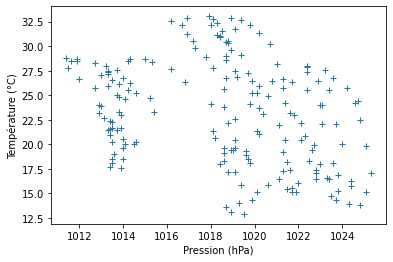

Lorsque la correlation entre température et pression es < 0, les grandeurs ont une tendance décorrélée l'une de l'autre.


In [42]:
# 4 - On calcule la covariance entre température et pression à partir de \sigma_{xy} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})

def covariance(liste1, liste2):
    """
    Cette fonction calcule la covariance entre deux listes de nombres.
    """
    somme = 0
    for x, y in zip(liste1, liste2):
        somme += (x - moyenne(liste1)) * (y - moyenne(liste2))
    return somme / len(liste1)

# On calcule le coefficient de corrélation entre la température et la pression
# à partir de \rho_{xy} = \frac{\sigma_{xy}}{\sigma_x \sigma_y}

def correlation(liste1, liste2):
    """
    Cette fonction calcule le coefficient de corrélation entre deux listes de nombres.
    """
    return covariance(liste1, liste2) / (np.std(liste1) * np.std(liste2))

covariance_temp_pression = covariance(temp, pression)
correlation_temp_pression = correlation(temp, pression)
print("Covariance température et pression: {:.3f}".format(covariance_temp_pression))
print("Corrélation température et pression: {:.3f}".format(correlation_temp_pression))

# On compare avec la fonction numpy.cov
print("Covariance température et pression avec numpy: {:.3f}".format(np.cov(temp, pression)[0, 1]))
print("Corrélation température et pression avec numpy: {:.3f}".format(np.corrcoef(temp, pression)[0, 1]))

plt.plot(pression,temp,'+')
plt.xlabel("Pression (hPa)")
plt.ylabel("Température (°C)")
plt.show()

print("Lorsque la correlation entre température et pression es < 0, les grandeurs ont une tendance décorrélée l'une de l'autre.")


# Exercice 4

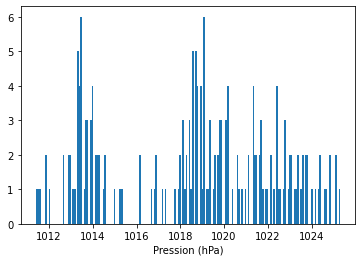

Moyenne pression: 1018.566
Variance pression: 14.297


In [79]:
# 1- Maintenant, on utilise une fonction bin pour trouver la moyenne et la variance de la température 
# On utilise la fonction matplotlib.pyplot.hist pour tracer l'histogramme de la pression
# 
# m = \sum_{i=1}^{n} f_i \frac{I_i + I_{i+1}}{2}
# avec I_i = la bordure du bin i

def moyenne_binned(liste, bins, N=len(pression)):
    """
    Cette fonction calcule la moyenne d'une liste de nombres.
    """
    somme = 0
    for i in range(len(bins) - 1):
        somme += liste[i] * (bins[i] + bins[i+1]) / 2
    return somme / N

# On calcule la variance à partir de bins -> v = \sum_{i=1}^{n} f_i ((I_i + I_{i+1})/2 - m)^2

def variance_binned(liste, bins, N=len(pression)):
    """
    Cette fonction calcule la variance d'une liste de nombres.
    """
    somme = 0
    m = moyenne_binned(liste, bins)
    for i in range(len(bins) - 1):
        somme += liste[i] * ((bins[i] + bins[i+1]) / 2 - m)**2
    return somme / N

n, bins, patches = plt.hist(pression, bins=len(pression), label="Pression")
plt.xlabel("Pression (hPa)")
plt.show()

moyenne_pression = moyenne_binned(n, bins)
variance_pression = variance_binned(n, bins)
print("Moyenne pression: {:.3f}".format(moyenne_pression))
print("Variance pression: {:.3f}".format(variance_pression))

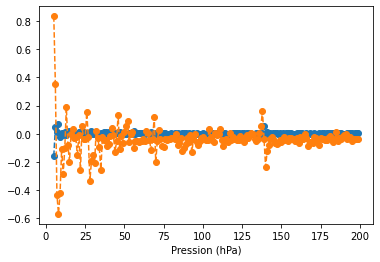

In [87]:

list_n = [i for i in range(5,200)]

list_moyenne = list()
list_variance = list()

for i in list_n:
    # get plt.hist() without plotting
    n, bins, _ = plt.hist(pression, bins=i, label="Pression")
    plt.clf()
    m = moyenne_binned(n, bins)
    v = variance_binned(n, bins)
    list_moyenne.append(m - moyenne_pression)
    list_variance.append(v - variance_pression)

plt.plot(list_n, list_moyenne,"--o",label="Moyenne pression")
plt.plot(list_n, list_variance, "--o", label="Variance pression")
plt.xlabel("Pression (hPa)")
plt.show()
    